# One sample

In [1]:
import numpy as np
import tensorflow as tf

# Data preparation
data = np.genfromtxt('iris_full.csv', 
                     delimiter=',', 
                     skip_header=1)
X = data[:,0:4]
y = data[:,4:]
N = X.shape[0]

X = np.c_[np.ones((N, 1)), X]

# shuffle
inds = np.arange(N)
np.random.shuffle(inds)

X = X[inds]
y = y[inds]

print(X[:5])
print(y[:5])

[[1.  5.7 2.6 3.5 1. ]
 [1.  6.  2.7 5.1 1.6]
 [1.  5.9 3.2 4.8 1.8]
 [1.  6.5 2.8 4.6 1.5]
 [1.  5.  3.4 1.6 0.4]]
[[1.]
 [1.]
 [1.]
 [1.]
 [0.]]


In [3]:
# theta
theta = tf.Variable([[0.01],
                     [-0.04], 
                     [0.02], 
                     [-0.03], 
                     [0.001]], dtype=tf.float64)
 
# forward
def compute_output(theta, X):
    return tf.math.sigmoid(tf.transpose(theta)@X)

In [4]:
# parameters
lr = 0.1
num_epochs = 5
loss_fn = tf.keras.losses.BinaryCrossentropy()

losses = []

In [5]:
# training
for epoch in range(num_epochs):
    for x_data, y_data in zip(X, y):
        # reshape -> (5,1)
        x_data = tf.reshape(x_data, (-1,1))
        
        with tf.GradientTape() as t:
            # y_hat
            y_hat = compute_output(theta, x_data)
            
            # loss
            loss = loss_fn(y_data, y_hat)
            
        losses.append(loss.numpy())            

        # gradient
        dtheta = t.gradient(loss, theta)

        # update
        theta.assign_sub(lr*dtheta)

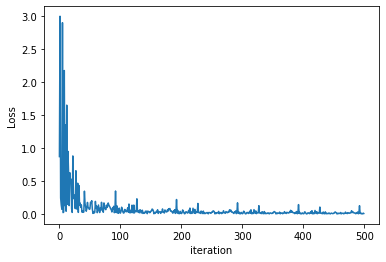

In [6]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.show()

# N samples

In [8]:
import numpy as np
import tensorflow as tf

# Data preparation
data = np.genfromtxt('iris_full.csv', 
                     delimiter=',', 
                     skip_header=1)
X = data[:,0:4]
y = data[:,4:]
N = X.shape[0]

X = np.c_[np.ones((N, 1)), X]

print(X[:10])

[[1.  5.1 3.5 1.4 0.2]
 [1.  4.9 3.  1.4 0.2]
 [1.  4.7 3.2 1.3 0.2]
 [1.  4.6 3.1 1.5 0.2]
 [1.  5.  3.6 1.4 0.2]
 [1.  5.4 3.9 1.7 0.4]
 [1.  4.6 3.4 1.4 0.3]
 [1.  5.  3.4 1.5 0.2]
 [1.  4.4 2.9 1.4 0.2]
 [1.  4.9 3.1 1.5 0.1]]


In [13]:
# theta
theta = tf.Variable([[0.01],
                     [-0.04], 
                     [0.02], 
                     [-0.03], 
                     [0.001]], dtype=tf.float64)
 
# forward
def compute_output(theta, X):
    return tf.math.sigmoid(X@theta)

In [14]:
# parameters
lr = 0.01
num_epochs = 1000
loss_fn = tf.keras.losses.BinaryCrossentropy()

losses = []

In [15]:
# training
for epoch in range(num_epochs):
    with tf.GradientTape() as t:
        # y_hat
        y_hat = compute_output(theta, X)
        
        # loss
        loss = loss_fn(y, y_hat)
        
    losses.append(loss.numpy())

    # gradient
    dtheta = t.gradient(loss, theta)

    # update
    theta.assign_sub(lr*dtheta)

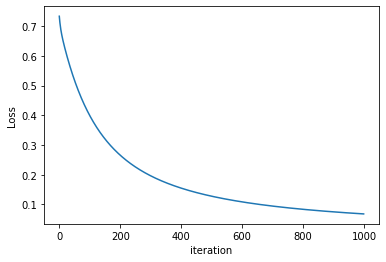

In [16]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.show()